<a href="https://colab.research.google.com/github/rhearjethvani/MITFutureMakers/blob/main/housingPricesPrediction/housingPricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [35]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/housepricedata.csv")

In [5]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
dataset = df.values

In [7]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [8]:
X = dataset[:, 0:10]

In [9]:
Y = dataset[:, 10]

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [19]:
model = Sequential([
                    Dense(32, activation='relu', input_shape=(10,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),
])

In [20]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
hist = model.fit(X_train, Y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 15s 18ms/step - loss: 0.7038 - accuracy: 0.4870 - val_loss: 0.6913 - val_accuracy: 0.5114
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5194 - val_loss: 0.6788 - val_accuracy: 0.6210
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6749 - val_loss: 0.6684 - val_accuracy: 0.6941
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.7118 - val_loss: 0.6599 - val_accuracy: 0.7580
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7564 - val_loss: 0.6522 - val_accuracy: 0.8037
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.8015 - val_loss: 0.6450 - val_accuracy: 0.8082
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.8226 - val_loss: 0.6383 - val_accuracy: 0.7991
Epoch 8/100

In [22]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8858


0.8858447670936584

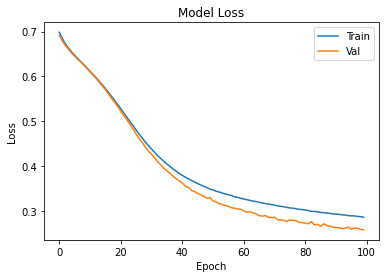

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

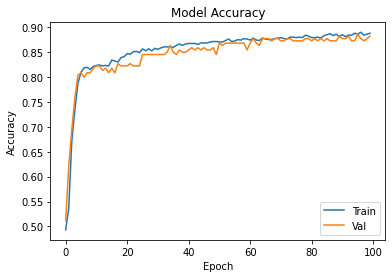

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
model_2 = Sequential([
                      Dense(1000, activation='relu', input_shape=(10,)),
                      Dense(1000, activation='relu'),
                      Dense(1000, activation='relu'),
                      Dense(1000, activation='relu'),
                      Dense(1, activation='sigmoid'),
])

In [30]:
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [31]:
hist_2 = model_2.fit(X_train, Y_train,
                     batch_size=32, epochs=100,
                     validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 50ms/step - loss: 0.5651 - accuracy: 0.6365 - val_loss: 0.3650 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3411 - accuracy: 0.8662 - val_loss: 0.3545 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3045 - accuracy: 0.8746 - val_loss: 0.2913 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2950 - accuracy: 0.8715 - val_loss: 0.3116 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2838 - accuracy: 0.9036 - val_loss: 0.2545 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2931 - accuracy: 0.8772 - val_loss: 0.2468 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2293 - accuracy: 0.9140 - val_loss: 0.3212 - val_accuracy: 0.8447
Epoch 

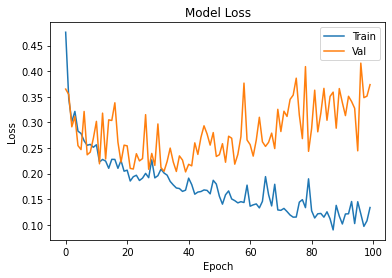

In [32]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

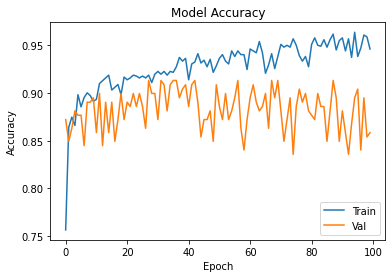

In [34]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [37]:
model_3 = Sequential([
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
                      Dropout(0.3),
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                      Dropout(0.3),
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                      Dropout(0.3),
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                      Dropout(0.3),
                      Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [38]:
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [40]:
hist_3 = model_3.fit(X_train, Y_train,
                     batch_size=32, epochs=100,
                     validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 68ms/step - loss: 21.1137 - accuracy: 0.5218 - val_loss: 3.9135 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 2s 51ms/step - loss: 2.5287 - accuracy: 0.7810 - val_loss: 0.6445 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 2s 51ms/step - loss: 0.6121 - accuracy: 0.8498 - val_loss: 0.5111 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4967 - accuracy: 0.8816 - val_loss: 0.4712 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 2s 50ms/step - loss: 0.5129 - accuracy: 0.8568 - val_loss: 0.5144 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 2s 51ms/step - loss: 0.5196 - accuracy: 0.8641 - val_loss: 0.4272 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 2s 51ms/step - loss: 0.5013 - accuracy: 0.8778 - val_loss: 0.4382 - val_accuracy: 0.8858
Epoch

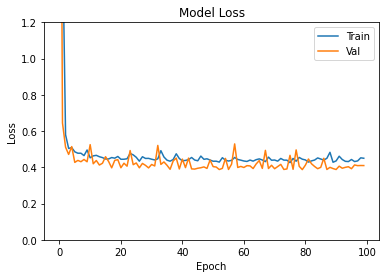

In [41]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

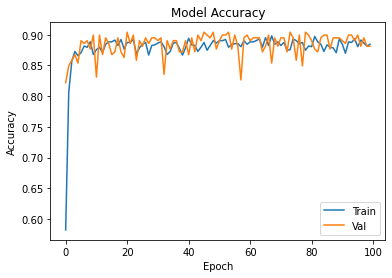

In [42]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()